In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install scikit-learn==1.2.2


In [3]:
match=pd.read_csv("/content/matches.csv")
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery=pd.read_csv("/content/deliveries.csv")
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [5]:
match.shape

(756, 18)

In [6]:
delivery.shape

(41304, 21)

In [7]:
totalscore_df=delivery.groupby(['match_id','inning']).sum()['total_runs']

<ipython-input-7-4c365a40bcae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalscore_df=delivery.groupby(['match_id','inning']).sum()['total_runs']


In [8]:
#typing rest_index() to assign index to df
totalscore_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
totalscore_df

<ipython-input-8-e2799e83a101>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalscore_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
350,174,1,143.0
351,174,2,137.0
352,175,1,161.0
353,175,2,150.0


In [9]:
totalscore_df=totalscore_df[totalscore_df['inning']==1]

In [10]:
totalscore_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
346,172,1,153.0
348,173,1,146.0
350,174,1,143.0
352,175,1,161.0


In [11]:
match_df=match.merge(totalscore_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172,IPL-2009,Centurion,22-05-2009,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,AC Gilchrist,SuperSport Park,BR Doctrove,DJ Harper,NaN,172,153.0
172,173,IPL-2009,Johannesburg,23-05-2009,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,173,146.0
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,174,143.0
174,175,IPL-2010,Mumbai,12-03-2010,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,field,normal,0,Kolkata Knight Riders,11,0,AD Mathews,Dr DY Patil Sports Academy,RE Koertzen,RB Tiffin,NaN,175,161.0


In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [14]:
teams=[
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [15]:
#use str.replac to replace one string with other string
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [16]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [17]:
match_df.shape

(148, 20)

In [18]:
match_df=match_df[match_df['dl_applied']==0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,172,IPL-2009,Centurion,22-05-2009,Delhi Capitals,Sunrisers Hyderabad,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,AC Gilchrist,SuperSport Park,BR Doctrove,DJ Harper,NaN,172,153.0
172,173,IPL-2009,Johannesburg,23-05-2009,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,173,146.0
173,174,IPL-2009,Johannesburg,24-05-2009,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,174,143.0
174,175,IPL-2010,Mumbai,12-03-2010,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,field,normal,0,Kolkata Knight Riders,11,0,AD Mathews,Dr DY Patil Sports Academy,RE Koertzen,RB Tiffin,NaN,175,161.0


In [19]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [20]:
delivery_df=match_df.merge(delivery,on='match_id')

In [21]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [22]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-22-eb2e5567854c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [23]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33573,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,3,TL Suman,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,146.0
33574,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,4,TL Suman,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,147.0
33575,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,5,Jaskaran Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,149.0
33576,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,6,Jaskaran Singh,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,150.0


In [24]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [25]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33573,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,3,TL Suman,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,146.0,15.0
33574,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,4,TL Suman,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,147.0,14.0
33575,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,5,Jaskaran Singh,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,149.0,12.0
33576,175,Mumbai,Kolkata Knight Riders,161.0,2,Deccan Chargers,Kolkata Knight Riders,20,6,Jaskaran Singh,...,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,150.0,11.0


In [26]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [27]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10-wickets
delivery_df.head()

<ipython-input-27-65932dda0c71>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115,10


In [28]:
#crr(current run rate)=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6/(120-delivery_df['balls_left']))
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0,NaN,NaN,1.0,206.0,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0,NaN,NaN,1.0,206.0,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0,NaN,NaN,1.0,206.0,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0,NaN,NaN,3.0,204.0,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0,NaN,NaN,7.0,200.0,115,10,8.4


In [29]:
#rrr(required run rate)=runs_left/overs_left
delivery_df['rrr']=delivery_df['runs_left']*6/delivery_df['balls_left']
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0,NaN,NaN,1.0,206.0,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0,NaN,NaN,1.0,206.0,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0,NaN,NaN,1.0,206.0,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0,NaN,NaN,3.0,204.0,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0,NaN,NaN,7.0,200.0,115,10,8.4,10.434783


In [30]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [31]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [32]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [33]:
final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

<ipython-input-33-63f993fa375e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
<ipython-input-33-63f993fa375e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
<ipython-input-33-63f993fa375e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [34]:
final_df.dropna(inplace=True)

<ipython-input-34-3665e38311c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [35]:
final_df=final_df[final_df['balls_left'] !=0]

In [36]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
20391,Chennai Super Kings,Mumbai Indians,Cape Town,125.0,83,8,165.0,6.486486,9.036145,0
15924,Rajasthan Royals,Kings XI Punjab,Chandigarh,120.0,44,6,221.0,7.973684,16.363636,0
14028,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,72.0,69,10,140.0,8.000000,6.260870,1
32747,Sunrisers Hyderabad,Delhi Capitals,Centurion,112.0,101,9,153.0,12.947368,6.653465,1
8801,Mumbai Indians,Chennai Super Kings,Chennai,195.0,113,9,208.0,11.142857,10.353982,0
...,...,...,...,...,...,...,...,...,...,...
22278,Mumbai Indians,Sunrisers Hyderabad,Durban,126.0,88,9,168.0,7.875000,8.590909,0
32082,Kings XI Punjab,Chennai Super Kings,Durban,57.0,30,6,116.0,3.933333,11.400000,0
11258,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,63.0,48,7,164.0,8.416667,7.875000,1
31339,Kolkata Knight Riders,Chennai Super Kings,Centurion,85.0,48,9,188.0,8.583333,10.625000,1


In [37]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
16492,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,192.0,106,8,197.0,2.142857,10.867925,0


In [38]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
11294,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,14.0,14,7,164.0,8.490566,6.000000
2566,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,140.0,99,8,159.0,5.428571,8.484848
25238,Rajasthan Royals,Sunrisers Hyderabad,Port Elizabeth,96.0,72,7,141.0,5.625000,8.000000
28596,Rajasthan Royals,Sunrisers Hyderabad,Kimberley,133.0,81,8,166.0,5.076923,9.851852
15918,Rajasthan Royals,Kings XI Punjab,Chandigarh,126.0,50,7,221.0,8.142857,15.120000
...,...,...,...,...,...,...,...,...,...
28156,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,67.0,40,4,157.0,6.750000,10.050000
11480,Kolkata Knight Riders,Rajasthan Royals,Jaipur,133.0,74,7,196.0,8.217391,10.783784
1867,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,107.0,57,8,172.0,6.190476,11.263158
33030,Royal Challengers Bangalore,Chennai Super Kings,Johannesburg,56.0,52,8,146.0,7.941176,6.461538


In [40]:
y_train

11294    1
2566     0
25238    1
28596    0
15918    0
        ..
28156    0
11480    0
1867     0
33030    1
15420    0
Name: result, Length: 12870, dtype: int64

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [43]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [44]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [45]:
X_train.shape

(12870, 9)

In [46]:
X_test.shape

(3218, 9)

In [47]:
y_train.shape

(12870,)

In [48]:
y_test.shape

(3218,)

In [49]:
y_pred=pipe.predict(X_test)

In [50]:
import joblib

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8576755748912368

In [52]:
joblib.dump(pipe, 'iplpred.joblib')

['iplpred.joblib']

In [53]:
loaded_pipe = joblib.load('iplpred.joblib')

In [54]:
loaded_pipe.predict_proba(X_test.iloc[[0]])

array([[0.31479794, 0.68520206]])

In [55]:
pipe.predict_proba(X_test)[4]

array([0.08054752, 0.91945248])

In [56]:
def match_summary(row):
      print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [57]:
def match_progression(x_df,match_id,pipe):
  match=x_df[x_df['match_id']==match_id]
  match=match[(match['ball']==6)]
  temp_df=match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']]
  temp_df=temp_df[temp_df['balls_left']!=0]
  result=pipe.predict_proba(temp_df)
  temp_df['lose']=np.round(result.T[0]*100,1)
  temp_df['win']=np.round(result.T[1]*100,1)
  temp_df['end_of_over']=range(1,temp_df.shape[0]+1)

  target=temp_df['total_runs_x'].values[0]
  runs= list(temp_df['runs_left'].values)
  new_runs=runs[:]
  runs.insert(0,target)
  temp_df['runs_after_over']=np.array(runs)[:-1]-np.array(new_runs)

  wickets=list(temp_df['wickets'].values)
  new_wickets=wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w=np.array(wickets)
  nw=np.array(new_wickets)
  temp_df['wickets_in_over']=(nw-w)[0:temp_df.shape[0]]

  print("Target",target)
  temp_df=temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
  return temp_df,target

In [58]:
temp_df,target=match_progression(delivery_df,10,pipe)
temp_df

Target 158.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
1093,1,6.0,0,23.9,76.1
1099,2,15.0,0,7.2,92.8
1105,3,7.0,0,7.1,92.9
1111,4,11.0,1,9.6,90.4
1117,5,3.0,1,24.8,75.2
1123,6,19.0,0,8.6,91.4
1129,7,3.0,0,10.5,89.5
1135,8,9.0,0,7.9,92.1
1141,9,3.0,0,9.3,90.7
1147,10,9.0,1,14.6,85.4


Text(0.5, 1.0, 'Target-158.0')

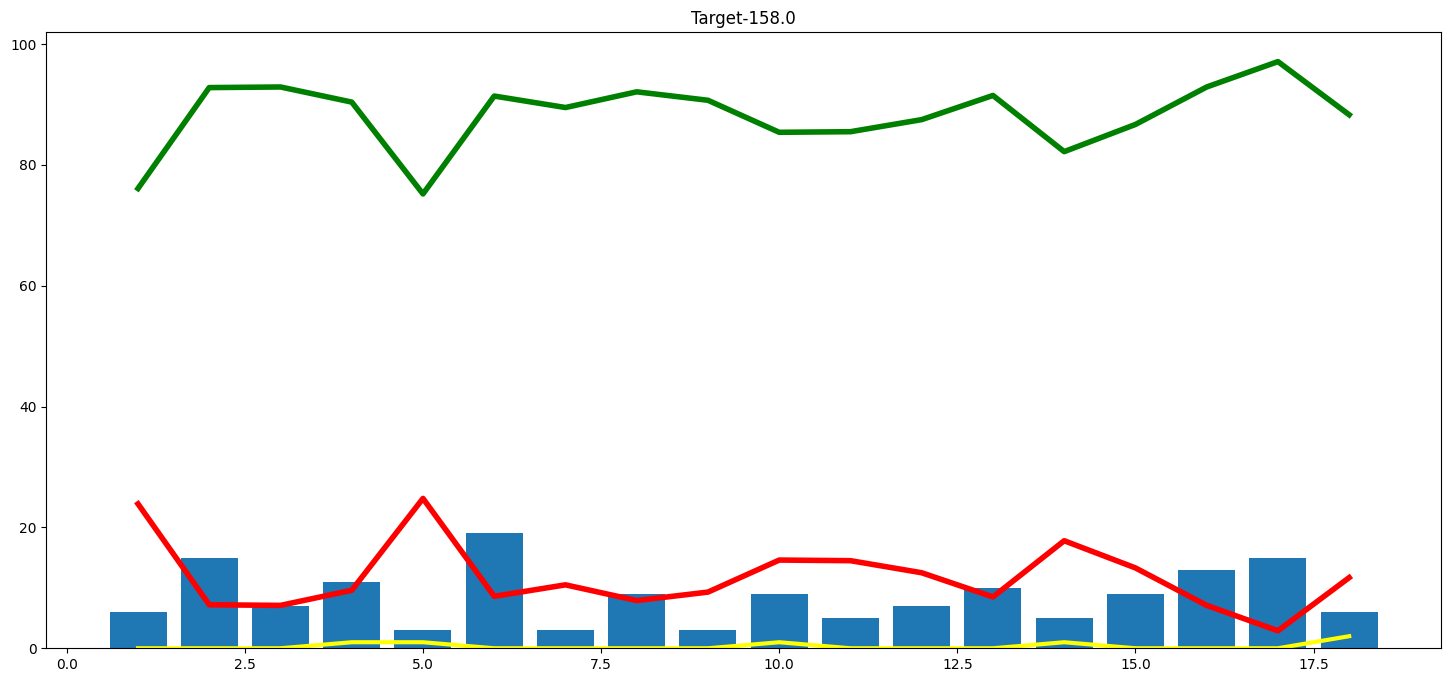

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [60]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [61]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein'], dtype=object)

In [62]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(pipe,open('label_encoders.pkl','wb'))

In [63]:
label_encoders =final_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']]

In [64]:
label_encoder_columns = label_encoders.keys()

In [65]:
for column in label_encoders.keys():
    print(column)

batting_team
bowling_team
city
runs_left
balls_left
wickets
total_runs_x
crr
rrr
